In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

from sklearn.preprocessing import OneHotEncoder

## Reading the Train Dataset

In [2]:
NSL_DF = pd.read_csv(r'archive/KDDTrain+.txt', header=None)
print("NSL KDD has {} records".format(NSL_DF.shape[0]))
NSL_DF.head(20)

NSL KDD has 125973 records


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.00,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.00,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.00,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.20,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.00,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
5,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.00,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
6,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166,9,1.0,1.00,0.0,0.0,0.05,0.06,0.00,255,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
7,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,16,1.0,1.00,0.0,0.0,0.14,0.06,0.00,255,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
8,0,tcp,remote_job,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,270,23,1.0,1.00,0.0,0.0,0.09,0.05,0.00,255,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
9,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,8,1.0,1.00,0.0,0.0,0.06,0.06,0.00,255,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21


### Columns of the dataset

In [3]:
# According to the NSL KDD website:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

In [4]:
NSL_DF.columns = columns
NSL_DF.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


## Preprocessing Dataset

In [72]:
NSL_DF.info()

# By showing info,
# 1- there is no null values
# 2- we have 3 categorical columns (protocol_type, service, flag), we need to encode them

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

### Processing Categorical Columns

In [79]:
print("Protocol_type categoris:  ",NSL_DF['protocol_type'].nunique())
print("Service categoris:  ",NSL_DF['service'].nunique())
print("Flag categoris:  ",NSL_DF['flag'].nunique())

print('\n')
print("Protocol type:   ")
print(NSL_DF['protocol_type'].value_counts())

print('\n')
print("service:   ")
print(NSL_DF['service'].value_counts())

print('\n')
print("flag:   ")
print(NSL_DF['flag'].value_counts())


# We notice that there are several service that their counts are so small compared to others, we may consider dropping them

Protocol_type categoris:   3
Service categoris:   70
Flag categoris:   11


Protocol type:   
tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64


service:   
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6860
             ...  
tftp_u           3
aol              2
harvest          2
http_8001        2
http_2784        1
Name: service, Length: 70, dtype: int64


flag:   
SF        74945
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: flag, dtype: int64


### OneHotEncoding Categorical Columns

In [107]:
NSL_Encoded = NSL_DF.copy()

onehot = OneHotEncoder(sparse = False, categories='auto')
categorical_cols = ['protocol_type', 'service', 'flag']

# one hot encoding
encoded_data = onehot.fit_transform(NSL_Encoded[categorical_cols])

# converting to df
encoded_df = pd.DataFrame(encoded_data, index=NSL_Encoded.index)
encoded_df.columns = onehot.get_feature_names()

# concatenate the original data and the encoded data using 
NSL_Encoded = pd.concat([NSL_Encoded, encoded_df], axis=1)

# drop original categorical data
NSL_Encoded = NSL_Encoded.drop(columns=categorical_cols)

In [108]:
NSL_Encoded.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,x0_icmp,x0_tcp,x0_udp,x1_IRC,x1_X11,x1_Z39_50,x1_aol,x1_auth,x1_bgp,x1_courier,x1_csnet_ns,x1_ctf,x1_daytime,x1_discard,x1_domain,x1_domain_u,x1_echo,x1_eco_i,x1_ecr_i,x1_efs,x1_exec,x1_finger,x1_ftp,x1_ftp_data,x1_gopher,x1_harvest,x1_hostnames,x1_http,x1_http_2784,x1_http_443,x1_http_8001,x1_imap4,x1_iso_tsap,x1_klogin,x1_kshell,x1_ldap,x1_link,x1_login,x1_mtp,x1_name,x1_netbios_dgm,x1_netbios_ns,x1_netbios_ssn,x1_netstat,x1_nnsp,x1_nntp,x1_ntp_u,x1_other,x1_pm_dump,x1_pop_2,x1_pop_3,x1_printer,x1_private,x1_red_i,x1_remote_job,x1_rje,x1_shell,x1_smtp,x1_sql_net,x1_ssh,x1_sunrpc,x1_supdup,x1_systat,x1_telnet,x1_tftp_u,x1_tim_i,x1_time,x1_urh_i,x1_urp_i,x1_uucp,x1_uucp_path,x1_vmnet,x1_whois,x2_OTH,x2_REJ,x2_RSTO,x2_RSTOS0,x2_RSTR,x2_S0,x2_S1,x2_S2,x2_S3,x2_SF,x2_SH
0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Splitting into X and Y

In [124]:
NSL_X = NSL_Encoded.drop(columns=['attack', 'level'])
NSL_Y = NSL_Encoded[['attack']]

NSL_X.head(3)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,x0_icmp,x0_tcp,x0_udp,x1_IRC,x1_X11,x1_Z39_50,x1_aol,x1_auth,x1_bgp,x1_courier,x1_csnet_ns,x1_ctf,x1_daytime,x1_discard,x1_domain,x1_domain_u,x1_echo,x1_eco_i,x1_ecr_i,x1_efs,x1_exec,x1_finger,x1_ftp,x1_ftp_data,x1_gopher,x1_harvest,x1_hostnames,x1_http,x1_http_2784,x1_http_443,x1_http_8001,x1_imap4,x1_iso_tsap,x1_klogin,x1_kshell,x1_ldap,x1_link,x1_login,x1_mtp,x1_name,x1_netbios_dgm,x1_netbios_ns,x1_netbios_ssn,x1_netstat,x1_nnsp,x1_nntp,x1_ntp_u,x1_other,x1_pm_dump,x1_pop_2,x1_pop_3,x1_printer,x1_private,x1_red_i,x1_remote_job,x1_rje,x1_shell,x1_smtp,x1_sql_net,x1_ssh,x1_sunrpc,x1_supdup,x1_systat,x1_telnet,x1_tftp_u,x1_tim_i,x1_time,x1_urh_i,x1_urp_i,x1_uucp,x1_uucp_path,x1_vmnet,x1_whois,x2_OTH,x2_REJ,x2_RSTO,x2_RSTOS0,x2_RSTR,x2_S0,x2_S1,x2_S2,x2_S3,x2_SF,x2_SH
0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.0,150,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.0,255,1,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.0,255,26,0.10,0.05,0.00,0.0,1.0,1.0,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Preprocessing Y Labels

In [111]:
NSL_Y.head(6)

,attack
0,normal
1,normal
2,neptune
3,normal
4,normal
5,neptune


['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land'
 'loadmodule' 'spy' 'perl']


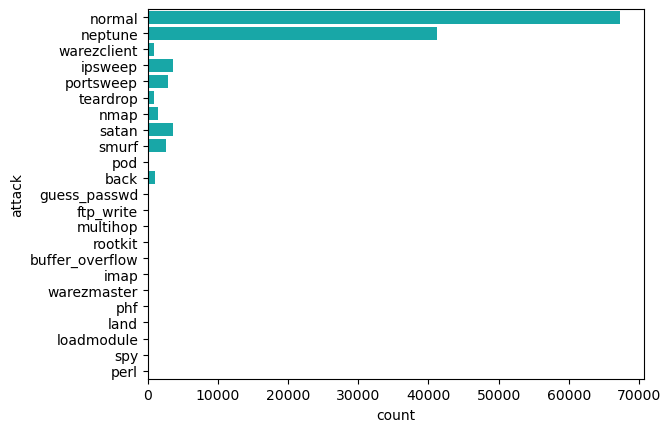

In [125]:
# Our dataset consists of many types on DoS Attacks and normal.
# since our goal is to classify between dos and normal attack, we will combine all dos attacks into (Attack)
# by combining all attacks in one label, we will get a balanced dataset (Normal/Attack)
print(NSL_Y['attack'].unique())

sns.countplot(y='attack', data=NSL_Y, color="c")
plt.show()

<ipython-input-126-78dece5fb530>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NSL_Y['attack'] = label


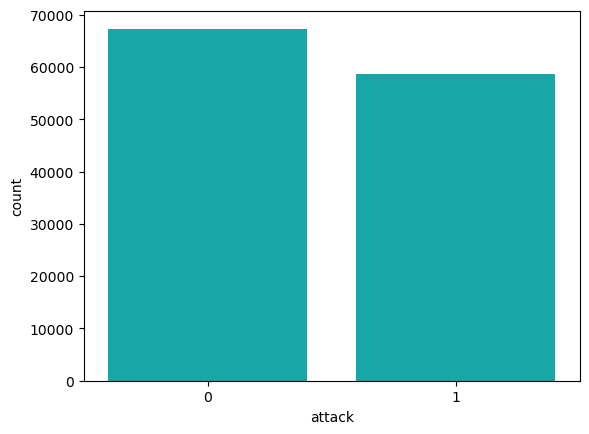

,attack
0,0
1,0
2,1
3,0
4,0
5,1
6,1
7,1
8,1
9,1


In [126]:
# Normal --> 0
# any attack --> 1

# by visualizing ----> now we have a good balanced dataset

label = []
for i in NSL_Y.attack :
    if i == 'normal':
        label.append(0)
    else:
        label.append(1)
        
        
NSL_Y['attack'] = label

sns.countplot(x='attack', data=NSL_Y, color="c")
plt.show()

NSL_Y.head(10)

## Splitting to Train/Validation Datasets

In [132]:
from sklearn.model_selection import train_test_split

train_x, val_x, train_y, val_y = train_test_split(NSL_X, NSL_Y, test_size=0.2, stratify=NSL_Y['attack'])

print("Total Shape:  ", NSL_X.shape)
print("Train Shape:  ", train_x.shape)
print("Valid Shape:  ", val_x.shape)

Total Shape:   (125973, 122)
Train Shape:   (100778, 122)
Valid Shape:   (25195, 122)


## Machine Learning Models

### Logestic Regression

C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Validaton Accuracy:  0.8787457828934312
Training Accuracy:  0.8768878128162892
[[12008  1594]
 [ 1461 10132]]


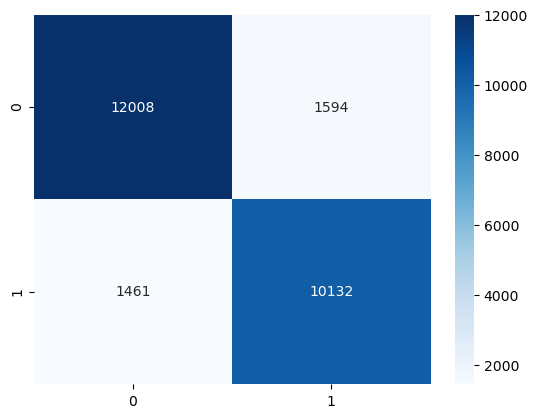

In [149]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix

model = LogisticRegression()
model.fit(train_x, train_y)

pred_y = model.predict(val_x)
print("Validaton Accuracy: ", accuracy_score(pred_y, val_y))
print("Training Accuracy: ", accuracy_score(model.predict(train_x), train_y))

cf_matrix = confusion_matrix(pred_y, val_y)
print(cf_matrix)
sns.heatmap(cf_matrix, cmap='Blues', annot=True, fmt='g')
plt.show()


# 87% accuracy on the base model !! not bad
# we will see how other models do on this data

### RandomForest Classifier

<ipython-input-151-de9d119d47c4>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_x, train_y)


Validaton Accuracy:  0.9984123834094066
Training Accuracy:  0.999960308797555
[[13459    30]
 [   10 11696]]


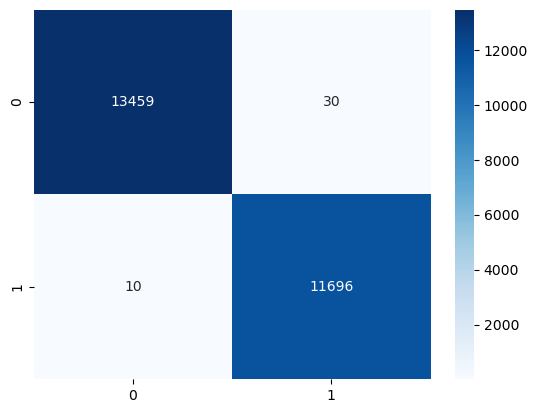

In [151]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(train_x, train_y)

pred_y = model.predict(val_x)
print("Validaton Accuracy: ", accuracy_score(pred_y, val_y))
print("Training Accuracy: ", accuracy_score(model.predict(train_x), train_y))

cf_matrix = confusion_matrix(pred_y, val_y)
print(cf_matrix)
sns.heatmap(cf_matrix, cmap='Blues', annot=True, fmt='g')
plt.show()


### KNN Classifier

<ipython-input-153-2abb08d3af4f>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(train_x, train_y)


Validaton Accuracy:  0.9951974598134551
Training Accuracy:  0.9967155529976781
[[13398    50]
 [   71 11676]]


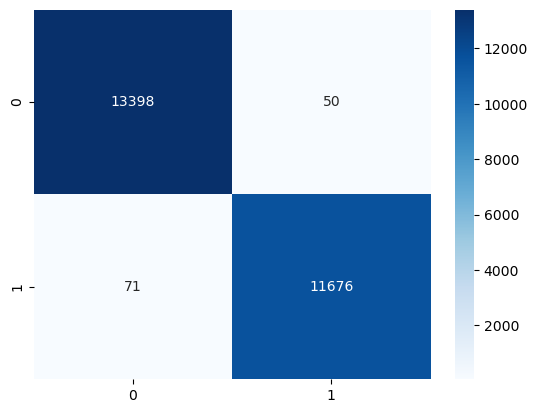

In [153]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(train_x, train_y)

pred_y = model.predict(val_x)
print("Validaton Accuracy: ", accuracy_score(pred_y, val_y))
print("Training Accuracy: ", accuracy_score(model.predict(train_x), train_y))

cf_matrix = confusion_matrix(pred_y, val_y)
print(cf_matrix)
sns.heatmap(cf_matrix, cmap='Blues', annot=True, fmt='g')
plt.show()


### Picking Best Model

In [155]:
# From the above models, we can see that RandomForest gives the best results
# we will use on Test dataset

# Training RandomForest on whole train data
best_model = RandomForestClassifier()
best_model.fit(NSL_X, NSL_Y)

<ipython-input-155-62ee0adc0ea8>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_model.fit(NSL_X, NSL_Y)


RandomForestClassifier()

## Reading the Test Dataset

In [156]:
NSL_test = pd.read_csv(r'archive/KDDTest+.txt', header=None)
print("Shape of Dataset is: " , NSL_test.shape)
print("NSL test has {} records and with {} columns".format(NSL_test.shape[0], NSL_test.shape[1]))
NSL_test.head()

Shape of Dataset is:  (22544, 43)
NSL test has 22544 records and with 43 columns


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [115]:
NSL_test.columns = columns
NSL_test.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.0,1.0,1.0,0.04,0.06,0.0,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.0,1.0,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.0,1.0,1.0,0.01,0.06,0.0,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.0,1.0,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.0,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.0,0.0,normal,21


In [116]:
NSL_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [117]:
NSL_test_encoded = NSL_test.copy()


# one hot encoding
encoded_test_data = onehot.transform(NSL_test_encoded[categorical_cols])

# converting to df
encoded_test_df = pd.DataFrame(encoded_test_data, index=NSL_test_encoded.index)
encoded_test_df.columns = onehot.get_feature_names()

# concatenate the original data and the encoded data using 
NSL_test_encoded = pd.concat([NSL_test_encoded, encoded_test_df], axis=1)

# drop original categorical data
NSL_test_encoded = NSL_test_encoded.drop(columns=categorical_cols)

NSL_test_encoded.head(3)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,x0_icmp,x0_tcp,x0_udp,x1_IRC,x1_X11,x1_Z39_50,x1_aol,x1_auth,x1_bgp,x1_courier,x1_csnet_ns,x1_ctf,x1_daytime,x1_discard,x1_domain,x1_domain_u,x1_echo,x1_eco_i,x1_ecr_i,x1_efs,x1_exec,x1_finger,x1_ftp,x1_ftp_data,x1_gopher,x1_harvest,x1_hostnames,x1_http,x1_http_2784,x1_http_443,x1_http_8001,x1_imap4,x1_iso_tsap,x1_klogin,x1_kshell,x1_ldap,x1_link,x1_login,x1_mtp,x1_name,x1_netbios_dgm,x1_netbios_ns,x1_netbios_ssn,x1_netstat,x1_nnsp,x1_nntp,x1_ntp_u,x1_other,x1_pm_dump,x1_pop_2,x1_pop_3,x1_printer,x1_private,x1_red_i,x1_remote_job,x1_rje,x1_shell,x1_smtp,x1_sql_net,x1_ssh,x1_sunrpc,x1_supdup,x1_systat,x1_telnet,x1_tftp_u,x1_tim_i,x1_time,x1_urh_i,x1_urp_i,x1_uucp,x1_uucp_path,x1_vmnet,x1_whois,x2_OTH,x2_REJ,x2_RSTO,x2_RSTOS0,x2_RSTR,x2_S0,x2_S1,x2_S2,x2_S3,x2_SF,x2_SH
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.0,1.0,1.0,0.04,0.06,0.0,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.0,1.0,neptune,21,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.0,1.0,1.0,0.01,0.06,0.0,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.0,1.0,neptune,21,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.0,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.0,0.0,normal,21,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [121]:
NSL_test_X = NSL_test_encoded.drop(columns=['attack','level'])
NSL_test_Y = NSL_test_encoded[['attack']]

In [122]:
NSL_test_Y

,attack
0,neptune
1,neptune
2,normal
3,saint
4,mscan
...,...
22539,normal
22540,normal
22541,back
22542,normal


<ipython-input-123-f55af3eacfc4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NSL_test_Y['attack'] = label


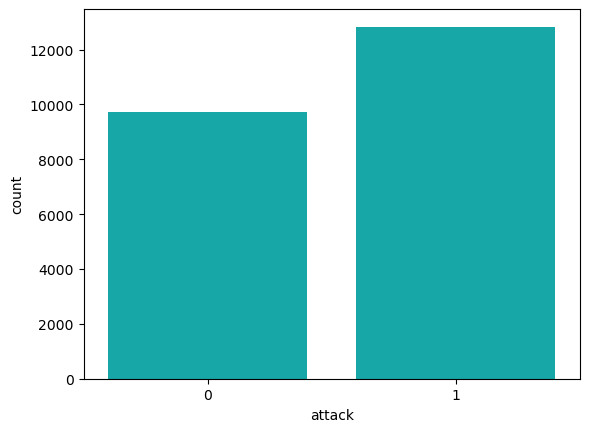

,attack
0,0
1,0
2,1
3,0
4,0
5,1
6,1
7,1
8,1
9,1


In [123]:
label = []
for i in NSL_test_Y.attack :
    if i == 'normal':
        label.append(0)
    else:
        label.append(1)
        
        
NSL_test_Y['attack'] = label

sns.countplot(x='attack', data=NSL_test_Y, color="c")
plt.show()

NSL_Y.head(10)

## Applying Picked Model

Training Accuracy:  0.999944432537131
Testing Accuracy:  0.7692512420156139
[[9447 4938]
 [ 264 7895]]


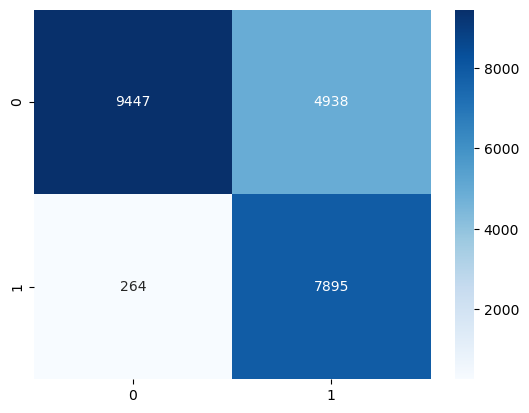

In [159]:
predicted_y = best_model.predict(NSL_test_X)

print("Training Accuracy: ", accuracy_score(best_model.predict(NSL_X), NSL_Y))
print("Testing Accuracy: ", accuracy_score(predicted_y, NSL_test_Y))

cf_matrix = confusion_matrix(predicted_y, NSL_test_Y)
print(cf_matrix)
sns.heatmap(cf_matrix, cmap='Blues', annot=True, fmt='g')
plt.show()

<ipython-input-160-71fe9fcc9eb4>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  best_model.fit(NSL_X, NSL_Y)


Training Accuracy:  0.9970469862589603
Testing Accuracy:  0.7658800567778566
[[9436 5003]
 [ 275 7830]]


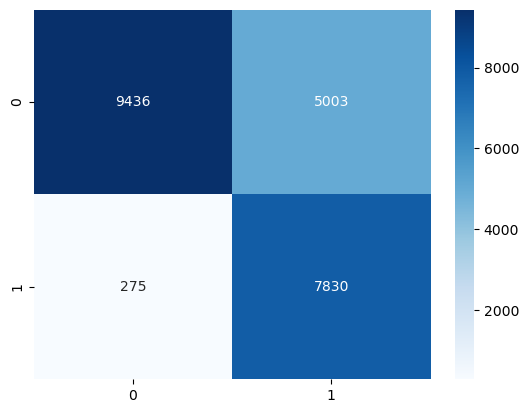

In [160]:
best_model = KNeighborsClassifier()
best_model.fit(NSL_X, NSL_Y)

predicted_y = best_model.predict(NSL_test_X)

print("Training Accuracy: ", accuracy_score(best_model.predict(NSL_X), NSL_Y))
print("Testing Accuracy: ", accuracy_score(predicted_y, NSL_test_Y))

cf_matrix = confusion_matrix(predicted_y, NSL_test_Y)
print(cf_matrix)
sns.heatmap(cf_matrix, cmap='Blues', annot=True, fmt='g')
plt.show()


# There is an overfit !!
# many normal in test dataset are predicted as attack, although almost all attacks are predicted right !!
# there is a bias towards ATTACK

<ipython-input-161-6189c9f60b12>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_model.fit(NSL_X, NSL_Y)


Training Accuracy:  0.999944432537131
Testing Accuracy:  0.7837562100780695
[[9447 4611]
 [ 264 8222]]


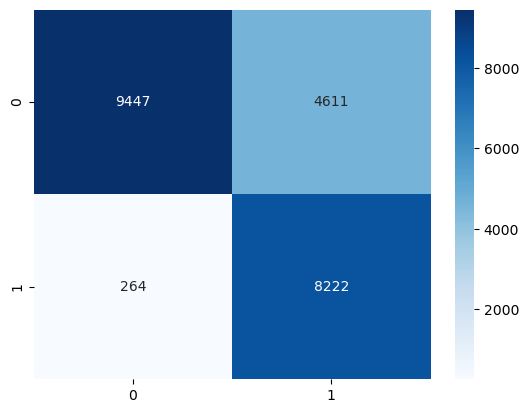

In [161]:
# Trying to solve overfitting

best_model = RandomForestClassifier(n_estimators=200, max_features=0.2)
best_model.fit(NSL_X, NSL_Y)

predicted_y = best_model.predict(NSL_test_X)

print("Training Accuracy: ", accuracy_score(best_model.predict(NSL_X), NSL_Y))
print("Testing Accuracy: ", accuracy_score(predicted_y, NSL_test_Y))

cf_matrix = confusion_matrix(predicted_y, NSL_test_Y)
print(cf_matrix)
sns.heatmap(cf_matrix, cmap='Blues', annot=True, fmt='g')
plt.show()


# Accuracy improved !
# trying more ..

<ipython-input-162-bb8d166b6c04>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_model.fit(NSL_X, NSL_Y)


Training Accuracy:  0.999944432537131
Testing Accuracy:  0.7651703335699077
[[9448 5031]
 [ 263 7802]]


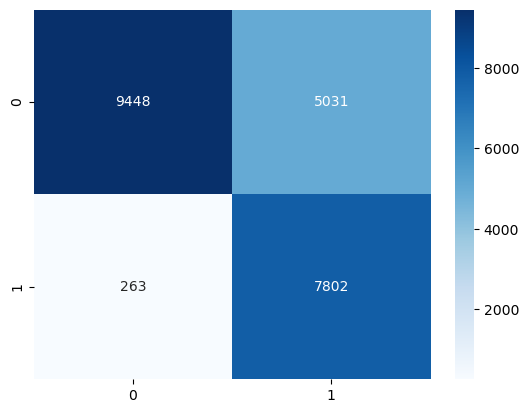

In [162]:
# Trying to solve overfitting

best_model = RandomForestClassifier(n_estimators=300, max_features=0.1)
best_model.fit(NSL_X, NSL_Y)

predicted_y = best_model.predict(NSL_test_X)

print("Training Accuracy: ", accuracy_score(best_model.predict(NSL_X), NSL_Y))
print("Testing Accuracy: ", accuracy_score(predicted_y, NSL_test_Y))

cf_matrix = confusion_matrix(predicted_y, NSL_test_Y)
print(cf_matrix)
sns.heatmap(cf_matrix, cmap='Blues', annot=True, fmt='g')
plt.show()
